In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from matplotlib import colors
import torch
import plotly.figure_factory as ff
import plotly.express as px
#import geopandas as gpd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [1]:
!cp -rf "/content/drive/MyDrive/Midwest Datathon 2023 Team 11/Datasets/rental-data" .
!cp -rf "/content/drive/MyDrive/Midwest Datathon 2023 Team 11/Datasets/park-spending" .

cp: cannot stat '/content/drive/MyDrive/Midwest Datathon 2023 Team 11/Datasets/Sales_Prices_City': No such file or directory
cp: cannot stat '/content/drive/MyDrive/Midwest Datathon 2023 Team 11/Datasets/rental-data': No such file or directory
cp: cannot stat '/content/drive/MyDrive/Midwest Datathon 2023 Team 11/Datasets/park-spending': No such file or directory


In [ ]:
#read in all rental data
rent2015 = pd.read_excel('rental-data/FMRArea_FY2015_50_RevFinal.xls')
rent2016 = pd.read_excel('rental-data/FMRArea_FY2016F_50_RevFinal.xlsx')
rent2017 = pd.read_excel('rental-data/FMRArea_FY2017_50_rev.xlsx')
rent2018 = pd.read_excel('rental-data/FY2018_50_FMRArea_rev.xlsx')
rent2019 = pd.read_excel('rental-data/FY2019_50_FMRArea_rev.xlsx')
rent2020 = pd.read_excel('rental-data/FY2020_50_FMRArea_rev2.xlsx')
rent2021 = pd.read_excel('rental-data/FY2021_50_FMRArea.xlsx')

In [ ]:
#read in all the park spending data
park2015 = pd.read_csv('park-spending/City Park Facts 2015--Spending and Staffing Data.csv')
park2016 = pd.read_csv('park-spending/Park System Spending and Staffing2016.csv')
park2017 = pd.read_csv('park-spending/Staffing and Spending - WEB DATA TABLES City Park Facts 2017.csv')
park2018 = pd.read_csv('park-spending/Staffing, Spending, Volunteers - WEB DATA TABLES City Park Facts 2018-Rev9718.csv')
park2019 = pd.read_csv('park-spending/Staffing, Spending, Volunteers - WEB DATA TABLES City Park Facts 2019.csv')
park2020 = pd.read_csv('park-spending/Staffing, Spending, Volunteers - WEB DATA TABLES City Park Facts 2020.csv')
#park2021 = pd.read_csv('park-spending/Staffing_Spending_Volunteers_WEB_DATA_TABLES_City_Park_Facts_2021.csv')

In [ ]:
#read in demographic data
!cp -rf "/content/drive/MyDrive/Midwest Datathon 2023 Team 11/Datasets/population-by-race-by-town-2020.csv" . #might need to change these lines
demographics = pd.read_csv('population-by-race-by-town-2020.csv')

ParserError: ignored

In [ ]:
#conjoin all sets with a lot of cleaning
#first join each rent and park by year
rent2015.keys()
rent2015_cleaned = rent2015[['Areaname', 'state_alpha']]
rent2015_cleaned['avg_rent_2015'] = rent2015[['Rent50_0', 'Rent50_1', 'Rent50_2', 'Rent50_3', 'Rent50_4']].mean(axis=1)
rent2015_cleaned['City'] = rent2015_cleaned['Areaname'].str.split(',').str[0]
rent2015_cleaned = rent2015_cleaned[rent2015_cleaned['City'].notnull()]
rent2015_cleaned = rent2015_cleaned[['City', 'state_alpha', 'avg_rent_2015']]
print(rent2015_cleaned)

                                    City state_alpha  avg_rent_2015
0                        Anniston-Oxford          AL          734.0
1                         Auburn-Opelika          AL          960.6
2                      Birmingham-Hoover          AL          901.4
3                         Chilton County          AL          683.2
4                          Walker County          AL          760.6
...                                  ...         ...            ...
2613  Barranquitas-Aibonito-Quebradillas          PR          466.0
2614                               Yauco          PR          503.2
2615       Puerto Rico HUD Nonmetro Area          PR          468.0
2616                    St. Croix Island          VI          866.4
2617                 St. John/St. Thomas          VI         1125.2

[2618 rows x 3 columns]


In [ ]:
print(park2015.head(10))
park2015_cleaned = park2015[['City','Capital Spending per Resident','Total Spending per Resident']]
park2015_cleaned = park2015_cleaned.dropna()
park2015_cleaned['SPR_2015'] = park2015_cleaned['Total Spending per Resident'].str.split('$').str[1].astype(float)
print(park2015_cleaned)

               City Population   Total Spending Operating Spending  \
0          New York  8,405,837  $1,364,246,406       $941,022,767    
1           Chicago  2,718,782    $472,102,995       $353,744,258    
2       Los Angeles  3,884,307    $317,485,144       $257,822,796    
3  Washington, D.C.    646,449    $223,588,164       $169,481,317    
4           Seattle    652,405    $194,267,589       $116,887,113    
5     San Francisco    837,442    $181,309,048       $148,376,986    
6          San Jose    998,537    $162,589,191        $61,601,771    
7         San Diego  1,355,896    $151,170,585       $138,495,467    
8       San Antonio  1,409,019    $136,788,147        $92,034,968    
9           Phoenix  1,513,367    $126,399,653       $107,011,715    

  Operating Spending per Resident Capital Spending  \
0                           $112     $423,223,639    
1                           $130     $118,358,737    
2                            $66      $59,662,348    
3            

In [ ]:
rent_park_2015 = rent2015_cleaned.merge(right=park2015_cleaned, on = 'City' , how = 'inner' )
rent_park_2015 = rent_park_2015[['City', 'avg_rent_2015','SPR_2015']]
rent_park_2015.head(10)

,City,avg_rent_2015,SPR_2015
0,Columbus,933.4,93.0
1,Columbus,933.4,93.0
2,Columbus,929.4,93.0
3,Columbus,889.8,93.0
4,Anchorage,1462.8,70.0
5,Tucson,974.2,87.0
6,Memphis,976.2,52.0
7,Memphis,976.2,52.0
8,Memphis,976.2,52.0
9,Fresno,1008.8,23.0


In [ ]:
#conjoin all sets with a lot of cleaning
#first join each rent and park by year
rent2016.keys()
rent2016_cleaned = rent2016[['areaname', 'state_alpha']]
rent2016_cleaned['avg_rent_2016'] = rent2016[['Rent50_0', 'Rent50_1', 'Rent50_2', 'Rent50_3', 'Rent50_4']].mean(axis=1)
rent2016_cleaned['City'] = rent2016_cleaned['areaname'].str.split(',').str[0]
rent2016_cleaned = rent2016_cleaned[rent2016_cleaned['City'].notnull()]
rent2016_cleaned = rent2016_cleaned[['City', 'state_alpha', 'avg_rent_2016']]
# print(rent2016_cleaned)
park2016.keys()
park2016_cleaned = park2016[['City','Total Spending per Resident']]
park2016_cleaned = park2016_cleaned[park2016_cleaned['Total Spending per Resident']!= 'n.a.']
# park2020_cleaned['City'] = park2020_cleaned['City'].str.split(',').str[0]
park2016_cleaned['SPR_2016'] = park2016_cleaned['Total Spending per Resident'].str.split('$').str[1].astype(float)
# park2016_cleaned = park2016_cleaned.dropna()
# print(park2016_cleaned)
rent_park_2016 = rent2016_cleaned.merge(right=park2016_cleaned, on = 'City' , how = 'inner' )
park2016_cleaned.sample(10)

,City,Total Spending per Resident,SPR_2016
45,Lincoln,$81,81.0
59,Garland,$69,69.0
101,"MEDIAN, All Cities",$76,76.0
84,Reno,$41,41.0
1,San Francisco,$241,241.0
86,Houston,$36,36.0
30,Fremont,$120,120.0
13,Chicago,$173,173.0
73,Memphis,$52,52.0
80,Albuquerque,$44,44.0


In [ ]:
#conjoin all sets with a lot of cleaning
#first join each rent and park by year
rent2017.keys()
rent2017_cleaned = rent2017[['areaname', 'state_alpha']]
rent2017_cleaned['avg_rent'] = rent2017[['Rent50_0', 'Rent50_1', 'Rent50_2', 'Rent50_3', 'Rent50_4']].mean(axis=1)
rent2017_cleaned['City'] = rent2017_cleaned['areaname'].str.split(',').str[0]
rent2017_cleaned = rent2017_cleaned[rent2017_cleaned['City'].notnull()]
rent2017_cleaned = rent2017_cleaned[['City', 'state_alpha', 'avg_rent']]
# print(rent2016_cleaned)
park2017.keys()
park2017_cleaned = park2017[['City','Spending per resident']]
park2017_cleaned = park2017_cleaned.dropna()
# print(park2016_cleaned)
rent_park_2017 = rent2017_cleaned.merge(right=park2017_cleaned, on = 'City' , how = 'inner' )
print(rent_park_2017.head(10))

In [ ]:
#conjoin all sets with a lot of cleaning
#first join each rent and park by year
rent2018.keys()
rent2018_cleaned = rent2018[['areaname18', 'state_alpha']]
rent2018_cleaned['avg_rent'] = rent2018[['rent50_0', 'rent50_1', 'rent50_2', 'rent50_3', 'rent50_4']].mean(axis=1)
rent2018_cleaned['City'] = rent2018_cleaned['areaname18'].str.split(',').str[0]
rent2018_cleaned = rent2018_cleaned[rent2018_cleaned['City'].notnull()]
rent2018_cleaned = rent2018_cleaned[['City', 'state_alpha', 'avg_rent']]
# print(rent2016_cleaned)
park2018.keys()
park2018_cleaned = park2018[['City','Spending per resident']]
park2018_cleaned['City'] = park2018_cleaned['City'].str.split(',').str[0]
park2018_cleaned = park2018_cleaned.dropna()
# print(park2018_cleaned)
rent_park_2018 = rent2018_cleaned.merge(right=park2018_cleaned, on = 'City' , how = 'inner' )
print(rent_park_2018.head(10))

In [ ]:
#conjoin all sets with a lot of cleaning
#first join each rent and park by year
rent2019.keys()
rent2019_cleaned = rent2019[['areaname19', 'state_alpha']]
rent2019_cleaned['avg_rent'] = rent2019[['rent50_0', 'rent50_1', 'rent50_2', 'rent50_3', 'rent50_4']].mean(axis=1)
rent2019_cleaned['City'] = rent2019_cleaned['areaname19'].str.split(',').str[0]
rent2019_cleaned = rent2019_cleaned[rent2019_cleaned['City'].notnull()]
rent2019_cleaned = rent2019_cleaned[['City', 'state_alpha', 'avg_rent']]
# print(rent2016_cleaned)
park2019.keys()
park2019_cleaned = park2019[['City','Spending per resident']]
park2019_cleaned['City'] = park2019_cleaned['City'].str.split(',').str[0]
park2019_cleaned = park2019_cleaned.dropna()
# print(park2018_cleaned)
rent_park_2019 = rent2019_cleaned.merge(right=park2019_cleaned, on = 'City' , how = 'inner' )
print(rent_park_2019.head(10))

In [ ]:
#conjoin all sets with a lot of cleaning
#first join each rent and park by year
rent2020.keys()
rent2020_cleaned = rent2020[['areaname20', 'state_alpha']]
rent2020_cleaned['avg_rent_2020'] = rent2020[['rent50_0', 'rent50_1', 'rent50_2', 'rent50_3', 'rent50_4']].mean(axis=1)
rent2020_cleaned['City'] = rent2020_cleaned['areaname20'].str.split(',').str[0]
rent2020_cleaned = rent2020_cleaned[rent2020_cleaned['City'].notnull()]
rent2020_cleaned = rent2020_cleaned[['City', 'state_alpha', 'avg_rent_2020']]
# print(rent2016_cleaned)
park2020.keys()
park2020_cleaned = park2020[['City','Spending per resident']]
park2020_cleaned['City'] = park2020_cleaned['City'].str.split(',').str[0]
park2020_cleaned = park2020_cleaned.dropna()
park2020_cleaned = park2020_cleaned[park2020_cleaned['Spending per resident']!= 'n.a.']
# park2020_cleaned['City'] = park2020_cleaned['City'].str.split(',').str[0]
park2020_cleaned['SPR_2020'] = park2020_cleaned['Spending per resident'].str.split('$').str[1].astype(float)
# print(park2020_cleaned.sample(10))
rent_park_2020 = rent2020_cleaned.merge(right=park2020_cleaned, on = 'City' , how = 'inner' )
rent_park_2020 = rent_park_2020[['City','avg_rent_2020','SPR_2020']]
print(rent_park_2020.head(10))

In [ ]:
rent_park_2020.plot.scatter(x='SPR_2020',y='avg_rent_2020')

In [ ]:
rent_park = rent_park_2015.merge(right=rent_park_2020, on = 'City' , how = 'inner' )
rent_park['diff_SPR'] = rent_park['SPR_2020'] - rent_park['SPR_2015']
rent_park['diff_avg_rent'] = rent_park['avg_rent_2020'] - rent_park['avg_rent_2015']
rent_park.sample(10)

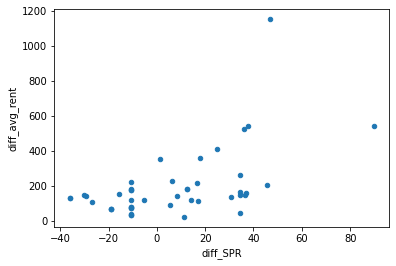

In [ ]:
rent_park.plot.scatter(x='diff_SPR',y='diff_avg_rent')

In [ ]:
rent_park = rent_park_2015.merge(right=rent_park_2016, on = 'City' , how = 'inner' )
rent_park['diff_SPR'] = rent_park['SPR_2016'] - rent_park['SPR_2015']
rent_park['diff_avg_rent'] = rent_park['avg_rent_2016'] - rent_park['avg_rent_2015']
rent_park.sample(10)

,City,avg_rent_2015,SPR_2015,state_alpha,avg_rent_2016,Total Spending per Resident,SPR_2016,diff_SPR,diff_avg_rent
40,Baton Rouge,887.4,49.0,LA,969.4,$49,49.0,0.0,82.0
21,Memphis,976.2,52.0,AR,972.6,$52,52.0,0.0,-3.6
22,Memphis,976.2,52.0,MS,972.6,$52,52.0,0.0,-3.6
38,Kansas City,950.0,115.0,MO,956.0,$130,130.0,15.0,6.0
35,Kansas City,950.0,115.0,KS,956.0,$130,130.0,15.0,6.0
44,Newark,1476.8,25.0,NJ,1519.6,$21,21.0,-4.0,42.8
37,Kansas City,950.0,115.0,KS,956.0,$130,130.0,15.0,6.0
39,Wichita,815.2,50.0,KS,830.8,$47,47.0,-3.0,15.6
45,Albuquerque,950.4,73.0,NM,1058.8,$44,44.0,-29.0,108.4
36,Kansas City,950.0,115.0,MO,956.0,$130,130.0,15.0,6.0


In [ ]:
coli2016 = pd.read_csv('2016COLI.txt', sep = '\t')
coli2016 = coli2016.drop(columns = ['A'])
coli2016 = coli2016.rename(columns = {'B': 'City', 'C': 'COLI'})
coli2016.head(3)

,City,COLI
0,"Hamilton, Bermuda",132.3
1,"San Francisco, CA, United States",103.4
2,"New York, NY, United States",100.0


In [ ]:
coli2017 = pd.read_csv('2017COLI.txt', sep = '\t')
coli2017 = coli2017.drop(columns = ['A'])
coli2017 = coli2017.rename(columns = {'B': 'City', 'C': 'COLI'})

In [ ]:
coli2018 = pd.read_csv('2018COLI.txt', sep = '\t')
coli2018 = coli2018.drop(columns = ['A'])
coli2018 = coli2018.rename(columns = {'B': 'City', 'C': 'COLI'})

In [ ]:
coli2019 = pd.read_csv('2019COLI.txt', sep = '\t')
coli2019 = coli2019.drop(columns = ['A'])
coli2019 = coli2019.rename(columns = {'B': 'City', 'C': 'COLI'})

In [ ]:
coli2021 = pd.read_csv('2021COLI.txt', sep = '\t')
coli2021 = coli2021.drop(columns = ['A'])
coli2021 = coli2021.rename(columns = {'B': 'City', 'C': 'COLI'})

In [ ]:
coli2022 = pd.read_csv('2022COLI.txt', sep = '\t')
coli2022 = coli2022.drop(columns = ['A'])
coli2022 = coli2022.rename(columns = {'B': 'City', 'C': 'COLI'})
coli2022[coli2022['City'] >= 'Washington']

In [ ]:
avgdiff = park2016_cleaned['SPR_2016'].mean()
stdev = park2016_cleaned['SPR_2016'].std()
highdiff = park2016_cleaned[park2016_cleaned['SPR_2016'] > avgdiff + 0.75*stdev] #we consider 1 stdev above the mean to be significant increase in greenspace spending

coli2016 = coli2016.rename(columns = {'City': 'City2'})
cities = [s[0:s.find(',')%len(s)] for s in coli2016['City2']]
coli2016['City'] = cities
print(coli2016.head(5))
print(avgdiff)
print(stdev)
highcoli16 = highdiff.merge(right = coli2016, on = 'City')
highcoli16.head(20)

                              City2   COLI           City
0                 Hamilton, Bermuda  132.3       Hamilton
1  San Francisco, CA, United States  103.4  San Francisco
2       New York, NY, United States  100.0       New York
3       Honolulu, HI, United States   99.7       Honolulu
4     Washington, DC, United States   96.2     Washington
97.0204081632653
57.98630830072862


,City,Total Spending per Resident,SPR_2016,City2,COLI
0,San Francisco,$241,241.0,"San Francisco, CA, United States",103.4
1,Minneapolis,$222,222.0,"Minneapolis, MN, United States",81.1
2,New York,$205,205.0,"New York, NY, United States",100.0
3,Irvine,$201,201.0,"Irvine, CA, United States",82.8
4,Cincinnati,$188,188.0,"Cincinnati, OH, United States",76.2
5,Virginia Beach,$186,186.0,"Virginia Beach, VA, United States",69.2
6,Tampa,$179,179.0,"Tampa, FL, United States",72.4
7,Chicago,$173,173.0,"Chicago, IL, United States",85.1
8,Portland,$172,172.0,"Portland, OR, United States",80.0
9,Raleigh,$159,159.0,"Raleigh, NC, United States",72.2


In [ ]:
coli21 = coli2021.rename(columns = {'City': 'City2'})
print(coli21.head())
coli1621 = coli2016.merge(right = coli21, on = 'City2')
coli1621['colidiff'] = coli1621['COLI_y']*5.905 - coli1621['COLI_x']*5.32
ovravg = coli1621['colidiff'].mean()
ovravg

                              City2   COLI
0                 Hamilton, Bermuda  146.3
1       New York, NY, United States  100.0
2       Honolulu, HI, United States   95.9
3  San Francisco, CA, United States   93.3
4      Anchorage, AK, United States   92.2


41.03762234042553

In [ ]:
gsp = coli1621.merge(highcoli16, on = 'City')
gspavg = gsp['colidiff'].mean()
gspavg

34.141500000000015

In [ ]:
coli18 = coli2018
coli1718 = coli2017.merge(right = coli18, on = 'City')
coli1718['colidiff'] = coli1718['COLI_y'] - coli1718['COLI_x']
ovravg = coli1718['colidiff'].mean()
ovravg

-1.4801526717557245

In [ ]:
coli1718.head()

,City,COLI_x,COLI_y,colidiff
0,"Hamilton, Bermuda",141.8,145.4,3.6
1,"New York, NY, United States",100.0,100.0,0.0
2,"Honolulu, HI, United States",99.5,94.1,-5.4
3,"San Francisco, CA, United States",99.1,97.8,-1.3
4,"Anchorage, AK, United States",98.7,95.0,-3.7
